## Hackthon Project

### About the data

The sample data dump shared below is the ad performance for the dates between 1st August 2020 and 28th Feb 2021.

Here is a brief hierarchy for relationships in adtech systems:

 


One Campaign can have one or more Ad Groups. One Ad group can have one or more ads. In the given dataset - we have only 1 campaign; 4 Ad Groups and multiple ads

### Data Description

 

- date: the date on which the ad was made live

- campaign: campaign number
 
- adgroup: adgroup number

- ad: ad number

- impressions - Number of time the ad was shown

- clicks - Number of time the ad clicked shown

- cost - Amount spent to show ad

- conversions - Number of transactions received

- revenue: revenue generated from the ad

Below is some context about the dataset:

 

#### Raw metrics:

- Impressions - Number of time the ad was shown

- Clicks - Number of time the ad clicked shown

- Cost - Amount spent to show ad

- Conversions - Number of transactions received (higher the better)

- Revenue - Total value of transactions received (higher the better)


#### Efficiency metrics (optional - can be used for creating new features/feature engineering): 

The below features can be newly created/calculated and used while building the models. These are based on raw metrics. 

CTR - Clicks / Impression (higher the better - used to evaluate if the users find the ad relevant)

CPC - Cost / Click (lower the better - used to evaluate if the cost for getting a click)

CPA - Cost / Conversion (lower the better - used to evaluate if the cost for getting a conversion)

ROI - Revenue/Cost (higher the better - used to evaluate the effectiveness of the advertising budget spent

In [264]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
from scipy.stats import boxcox

## Data Reading 

In [265]:
data = pd.read_csv('Train_Data.csv', parse_dates=['date'])
test = pd.read_csv('Test_Data.csv')
df =  data.copy()

In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4571 entries, 0 to 4570
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         4571 non-null   datetime64[ns]
 1   campaign     4571 non-null   object        
 2   adgroup      4571 non-null   object        
 3   ad           4571 non-null   object        
 4   impressions  4571 non-null   int64         
 5   clicks       4571 non-null   int64         
 6   cost         4571 non-null   float64       
 7   conversions  4571 non-null   int64         
 8   revenue      4571 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 321.5+ KB


In [267]:
df.describe()

,impressions,clicks,cost,conversions,revenue
count,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000
mean,92.635747,43.340844,2.800834,1.339094,231.865340
std,198.349737,100.164913,14.361618,5.223922,1091.742763
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,2.000000,0.040000,0.000000,0.000000
50%,16.000000,7.000000,0.210000,0.000000,0.000000
75%,84.000000,38.000000,1.350000,1.000000,92.600000
max,3239.000000,1771.000000,531.250000,94.000000,20515.410000


In [268]:
df.shape

(4571, 9)

In [269]:
df.drop('campaign', axis = 1, inplace = True) # because camppaign has only one uique value

In [270]:
df.head()

,date,adgroup,ad,impressions,clicks,cost,conversions,revenue
0,2020-01-08,adgroup 1,ad 1,24,6,0.08,0,0.00
1,2020-01-08,adgroup 2,ad 1,1,0,0.00,0,0.00
2,2020-01-08,adgroup 3,ad 1,13,4,0.04,0,0.00
3,2020-01-08,adgroup 4,ad 1,5,4,0.08,0,0.00
4,2020-01-08,adgroup 1,ad 2,247,126,1.29,4,925.71


###  Creating some new features based on existing features

In [271]:
# add columns which are mentioned above 

#### Efficiency metrics (optional - can be used for creating new features/feature engineering): 

# The below features can be newly created/calculated and used while building the models. These are based on raw metrics. 

# CTR - Clicks / Impression (higher the better - used to evaluate if the users find the ad relevant)

# CPC - Cost / Click (lower the better - used to evaluate if the cost for getting a click)

# CPA - Cost / Conversion (lower the better - used to evaluate if the cost for getting a conversion)

# ROI - Revenue/Cost (higher the better - used to evaluate the effectiveness of the advertising budget spent

In [272]:
df['CTR'] = df.clicks / df.impressions
df['CPC'] = df.cost/df.clicks
df['CPA'] = df.cost / df.conversions
df['ROI'] = df.revenue / df.cost


In [273]:
df.head()

,date,adgroup,ad,impressions,clicks,cost,conversions,revenue,CTR,CPC,CPA,ROI
0,2020-01-08,adgroup 1,ad 1,24,6,0.08,0,0.00,0.250000,0.013333,inf,0.000000
1,2020-01-08,adgroup 2,ad 1,1,0,0.00,0,0.00,0.000000,NaN,NaN,NaN
2,2020-01-08,adgroup 3,ad 1,13,4,0.04,0,0.00,0.307692,0.010000,inf,0.000000
3,2020-01-08,adgroup 4,ad 1,5,4,0.08,0,0.00,0.800000,0.020000,inf,0.000000
4,2020-01-08,adgroup 1,ad 2,247,126,1.29,4,925.71,0.510121,0.010238,0.3225,717.604651


In [274]:
ad_factor = pd.DataFrame(pd.crosstab(index =  df.ad, columns = df.adgroup, values= df.conversions, aggfunc='mean')).unstack()
ad_factor = pd.DataFrame(ad_factor)

In [275]:
ad_factor = ad_factor.reset_index()

In [276]:
ad_factor.rename(columns={0:'values'}, inplace =  True)

In [277]:
m1 = (ad_factor['adgroup'] == 'adgroup 1')
m2 = (ad_factor['adgroup'] == "adgroup 2")
m3 = (ad_factor['adgroup'] == 'adgroup 3')
m4 = (ad_factor['adgroup'] == 'adgroup 4')

ad_factor.loc[m1, 'values'] = ad_factor.loc[m1,'values'].fillna(ad_factor.loc[m1,'values'].mean())
ad_factor.loc[m2, 'values'] = ad_factor.loc[m2,'values'].fillna(ad_factor.loc[m2,'values'].mean())
ad_factor.loc[m3, 'values'] = ad_factor.loc[m3,'values'].fillna(ad_factor.loc[m3,'values'].mean())
ad_factor.loc[m4, 'values'] = ad_factor.loc[m4,'values'].fillna(ad_factor.loc[m4,'values'].mean())


In [278]:
ad_factor.head()

,adgroup,ad,values
0,adgroup 1,ad 1,0.316667
1,adgroup 1,ad 10,0.174419
2,adgroup 1,ad 11,2.333333
3,adgroup 1,ad 12,2.166667
4,adgroup 1,ad 13,9.500000


In [279]:
ad_factor['key'] = ad_factor['adgroup'] + ' ' + ad_factor['ad']

In [280]:
ad_factor.set_index('key', inplace = True)

In [281]:
my_dict  = ad_factor.to_dict()['values']

In [282]:
df['keys'] =df['adgroup'] + ' ' + df['ad']

In [283]:
values_dict=[]
for i in df['keys']:
    for j, k in my_dict.items():
        if i == j:
            values_dict.append(k)

In [284]:
df['ad_values'] =  values_dict

In [285]:
df.drop(columns=["date", 'keys', 'adgroup', 'ad'], inplace =  True)

In [286]:
df

,impressions,clicks,cost,conversions,revenue,CTR,CPC,CPA,ROI,ad_values
0,24,6,0.08,0,0.00,0.250000,0.013333,inf,0.000000,0.316667
1,1,0,0.00,0,0.00,0.000000,NaN,NaN,NaN,0.000000
2,13,4,0.04,0,0.00,0.307692,0.010000,inf,0.000000,0.227778
3,5,4,0.08,0,0.00,0.800000,0.020000,inf,0.000000,0.092715
4,247,126,1.29,4,925.71,0.510121,0.010238,0.3225,717.604651,5.396552
...,...,...,...,...,...,...,...,...,...,...
4566,19,6,0.07,0,0.00,0.315789,0.011667,inf,0.000000,0.106383
4567,1,0,0.00,0,0.00,0.000000,NaN,NaN,NaN,0.000000
4568,16,8,0.12,1,93.20,0.500000,0.015000,0.1200,776.666667,0.212766
4569,37,13,0.23,0,0.00,0.351351,0.017692,inf,0.000000,0.255319


In [287]:
df.isnull().sum()

impressions      0
clicks           0
cost             0
conversions      0
revenue          0
CTR              0
CPC            444
CPA            444
ROI            444
ad_values        0
dtype: int64

In [288]:
df.fillna(0, inplace =  True)

In [289]:
df.isnull().sum()

impressions    0
clicks         0
cost           0
conversions    0
revenue        0
CTR            0
CPC            0
CPA            0
ROI            0
ad_values      0
dtype: int64

## Exploratory Data Analysis

In [290]:
df.columns

Index(['impressions', 'clicks', 'cost', 'conversions', 'revenue', 'CTR', 'CPC',
       'CPA', 'ROI', 'ad_values'],
      dtype='object')

In [291]:
for i in df.columns:
    print(i, len(df[i].unique()), end = ' ')

impressions 571 clicks 355 cost 810 conversions 49 revenue 1223 CTR 1316 CPC 1877 CPA 878 ROI 1350 ad_values 103 

**No Binary feature is present in this data set** 


Now for directily going for ordinal because if we check ad & adgroup has object type only this data set


**Working on numerical columns**

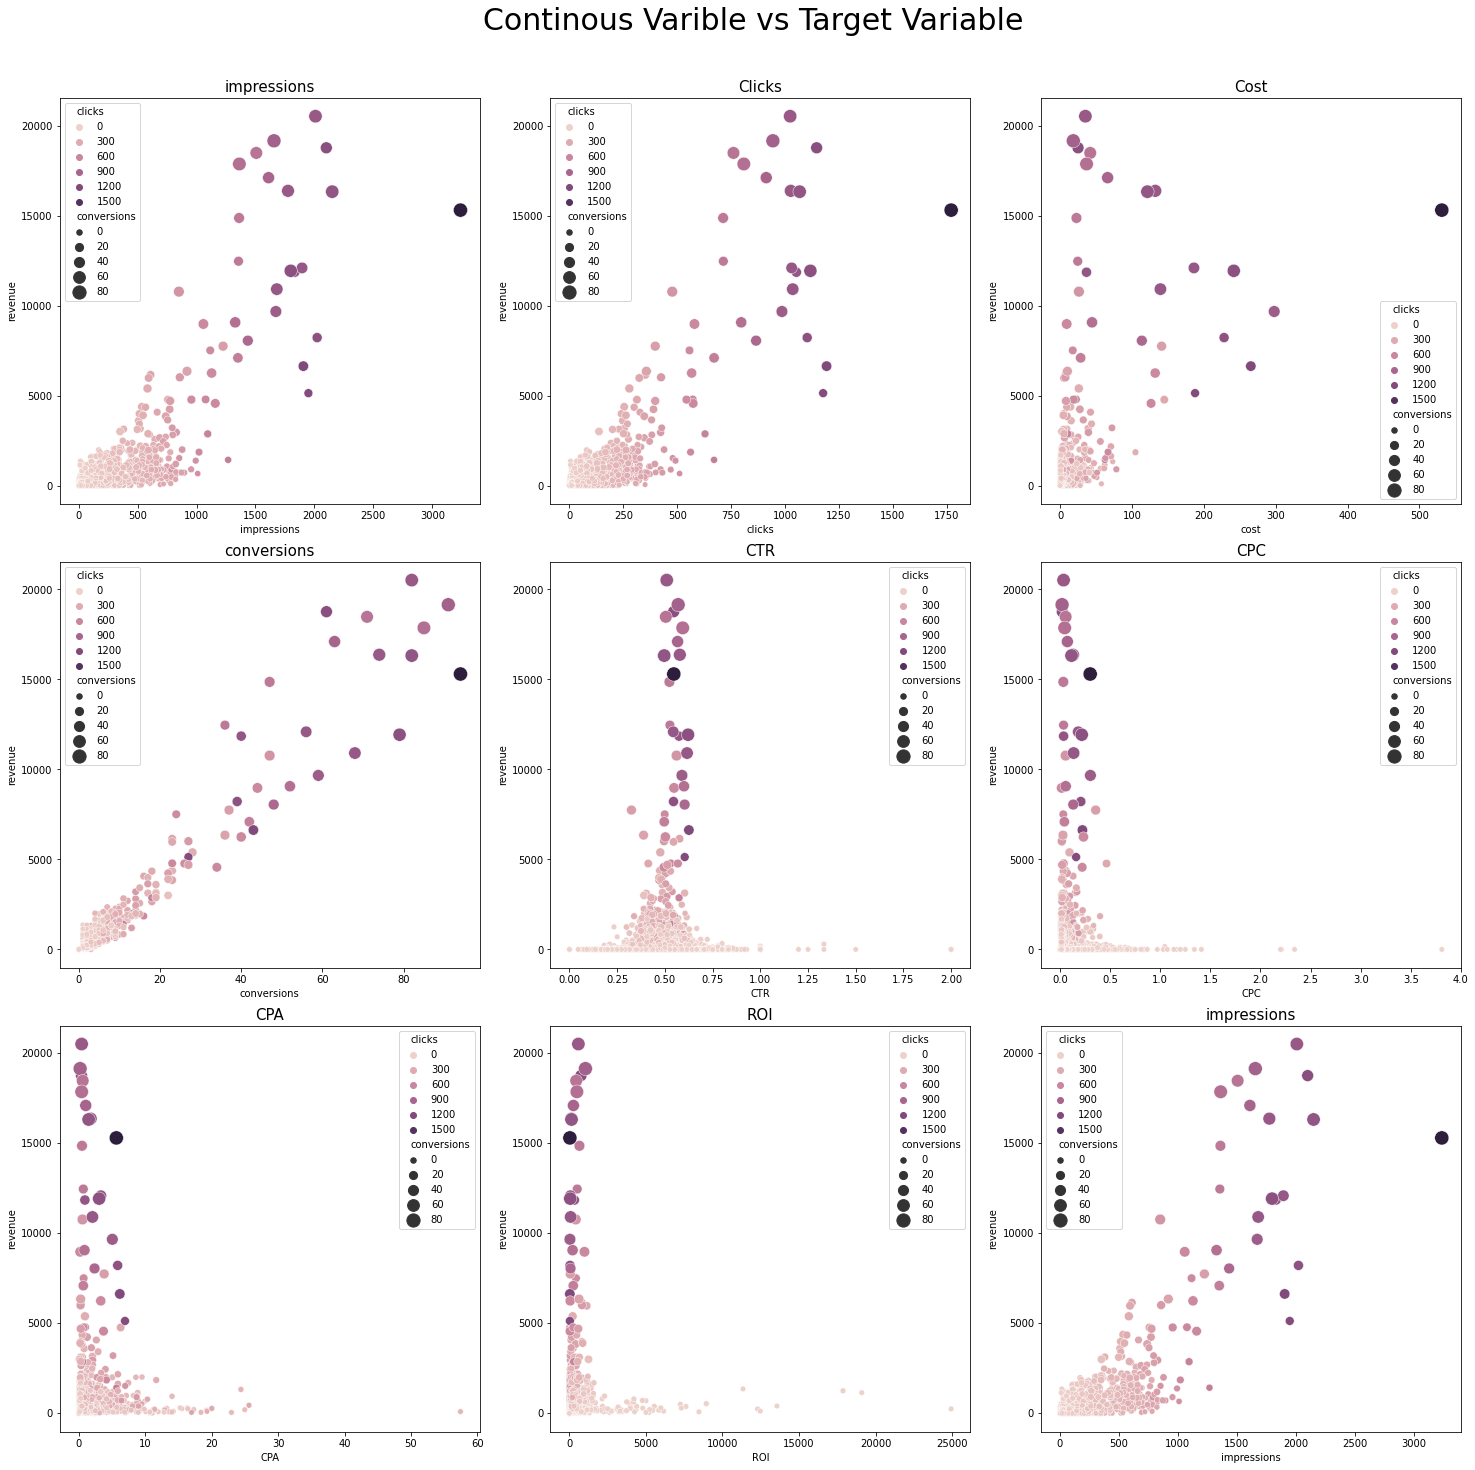

In [292]:
# len(num_cols)
fig, ax = plt.subplots(3,3, figsize = (21,21))
fig.tight_layout(pad=  4.0)
fig.subplots_adjust(top = 0.92)
fig.suptitle('Continous Varible vs Target Variable', fontsize = 30)
sns.scatterplot(ax= ax[0,0], data = df, x = 'impressions', y = 'revenue' , hue= "clicks", size = 'conversions', sizes=(30,200))
ax[0,0].set_title('impressions', fontsize = 15)
sns.scatterplot(ax= ax[0,1], data = df, x = 'clicks', y = 'revenue' , hue= "clicks", size = 'conversions', sizes=(30,200))
ax[0,1].set_title('Clicks', fontsize = 15)
sns.scatterplot(ax= ax[0,2], data = df, x = 'cost', y = 'revenue' , hue= "clicks", size = 'conversions', sizes=(30,200))
ax[0,2].set_title('Cost', fontsize = 15)
sns.scatterplot(ax= ax[1,0], data = df, x = 'conversions', y = 'revenue' , hue= "clicks", size = 'conversions', sizes=(30,200))
ax[1,0].set_title('conversions', fontsize = 15)
sns.scatterplot(ax= ax[1,1], data = df, x = 'CTR', y = 'revenue' , hue= "clicks", size = 'conversions', sizes=(30,200))
ax[1,1].set_title('CTR', fontsize = 15)
sns.scatterplot(ax= ax[1,2], data = df, x = 'CPC', y = 'revenue' , hue= "clicks", size = 'conversions', sizes=(30,200))
ax[1,2].set_title('CPC', fontsize = 15)
sns.scatterplot(ax= ax[2,0], data = df, x = 'CPA', y = 'revenue' , hue= "clicks", size = 'conversions', sizes=(30,200))
ax[2,0].set_title('CPA', fontsize = 15)
sns.scatterplot(ax= ax[2,1], data = df, x = 'ROI', y = 'revenue' , hue= "clicks", size = 'conversions', sizes=(30,200))
ax[2,1].set_title('ROI', fontsize = 15)
sns.scatterplot(ax= ax[2,2], data = df, x = 'impressions', y = 'revenue' , hue= "clicks", size = 'conversions', sizes=(30,200))
ax[2,2].set_title('impressions', fontsize = 15)
fig.savefig('Numeric.jpg', dpi = 200)

**Checking for skewness & outliers**

c:\users\anant sakhare\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\anant sakhare\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


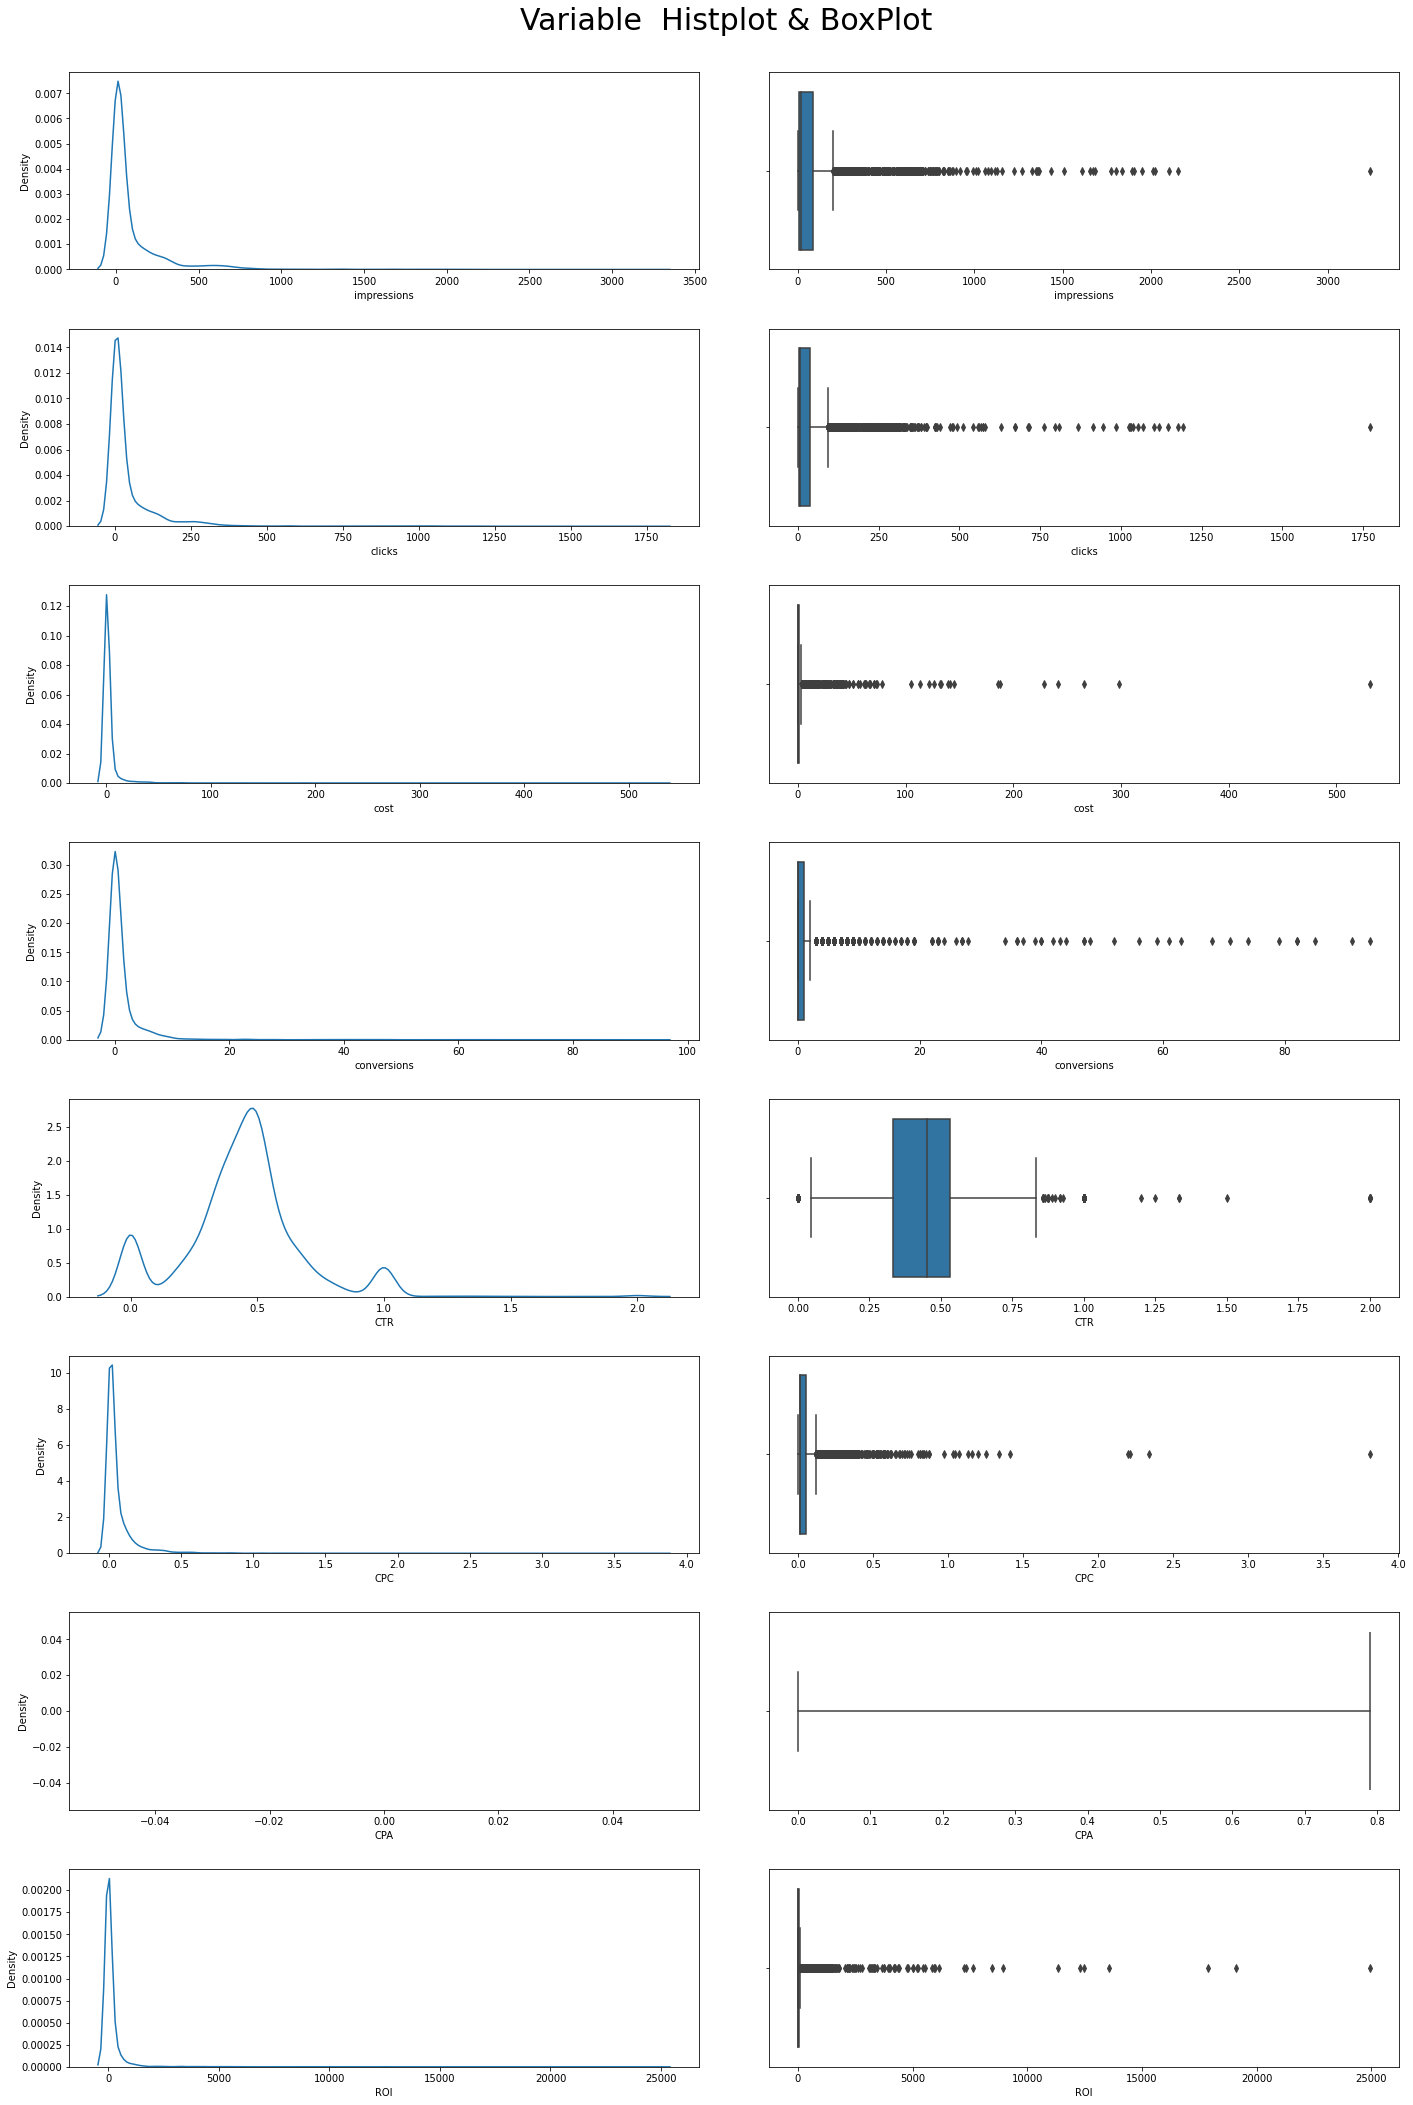

In [293]:
fig, ax = plt.subplots(8,2, figsize = (20,30))
fig.tight_layout(pad = 4.0)
fig.subplots_adjust(top = 0.95)
fig.suptitle('Variable  Histplot & BoxPlot', size = 30)
sns.kdeplot(ax= ax[0,0], data = df, x = 'impressions')
sns.boxplot(ax= ax[0,1], data = df, x = 'impressions')

sns.kdeplot(ax= ax[1,0], data = df, x = 'clicks')
sns.boxplot(ax= ax[1,1], data = df, x = 'clicks')

sns.kdeplot(ax= ax[2,0], data = df, x = 'cost')
sns.boxplot(ax= ax[2,1], data = df, x = 'cost')

sns.kdeplot(ax= ax[3,0], data = df, x = 'conversions')
sns.boxplot(ax= ax[3,1], data = df, x = 'conversions')

sns.kdeplot(ax= ax[4,0], data = df, x = 'CTR')
sns.boxplot(ax= ax[4,1], data = df, x = 'CTR')

sns.kdeplot(ax= ax[5,0], data = df, x = 'CPC')
sns.boxplot(ax= ax[5,1], data = df, x = 'CPC')

sns.kdeplot(ax= ax[6,0], data = df, x = 'CPA')
sns.boxplot(ax= ax[6,1], data = df, x = 'CPA')

sns.kdeplot(ax= ax[7,0], data = df, x = 'ROI')
sns.boxplot(ax= ax[7,1], data = df, x = 'ROI')
fig.savefig('outliers.jpg', dpi = 200)

**Outliers Treatments**

c:\users\anant sakhare\appdata\local\programs\python\python37\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\users\anant sakhare\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
c:\users\anant sakhare\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


<AxesSubplot:xlabel='ROI'>

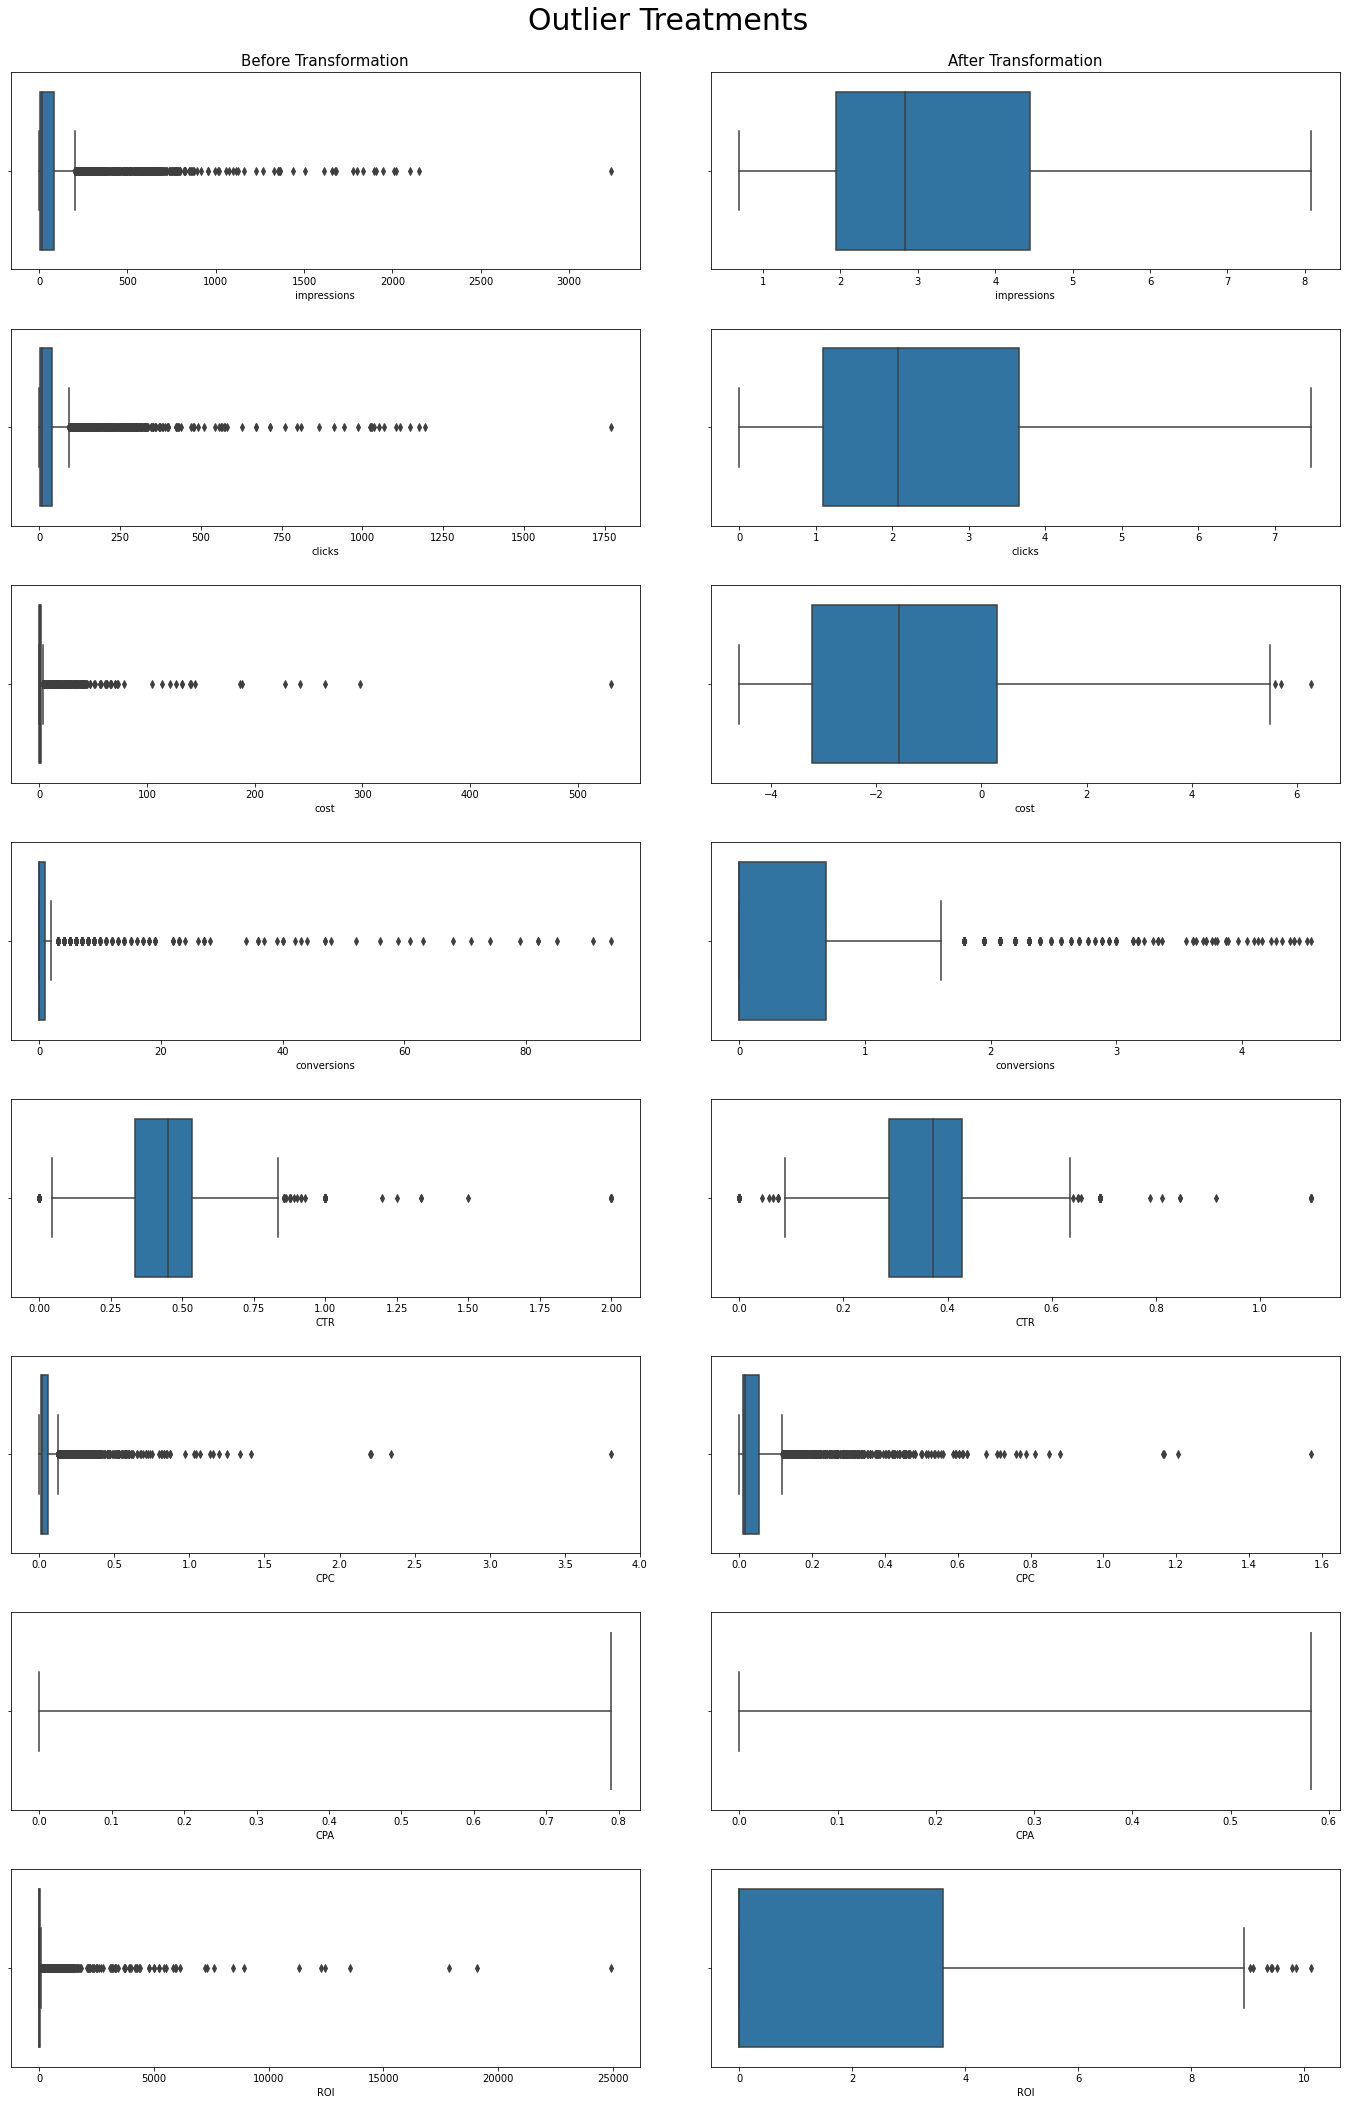

In [294]:
fig, ax = plt.subplots(8,2, figsize = (20,30))
fig.tight_layout(pad = 4.0)
fig.subplots_adjust(top = 0.95)
fig.suptitle('Outlier Treatments', size = 30)
sns.boxplot(ax= ax[0,0], data = df, x = 'impressions')
ax[0,0].set_title('Before Transformation', size = 15)
sns.boxplot(ax= ax[0,1], x =  np.log1p(df.impressions))
ax[0,1].set_title('After Transformation', size = 15)

sns.boxplot(ax= ax[1,0], data = df, x = 'clicks')
sns.boxplot(ax= ax[1,1], x =  np.log1p(df.clicks))

sns.boxplot(ax= ax[2,0], data = df, x = 'cost')
sns.boxplot(ax= ax[2,1], x =  np.log(df.cost))

sns.boxplot(ax= ax[3,0], data = df, x = 'conversions')
sns.boxplot(ax= ax[3,1], x =  np.log1p(df.conversions))

sns.boxplot(ax= ax[4,0], data = df, x = 'CTR')
sns.boxplot(ax= ax[4,1], x =  np.log1p(df.CTR))

sns.boxplot(ax= ax[5,0], data = df, x = 'CPC')
sns.boxplot(ax= ax[5,1], x =  np.log1p(df.CPC))

sns.boxplot(ax= ax[6,0], data = df, x = 'CPA')
sns.boxplot(ax= ax[6,1], x =  np.log1p(df.CPA))

sns.boxplot(ax= ax[7,0], data = df, x = 'ROI')
sns.boxplot(ax= ax[7,1], x =  np.log1p(df.ROI))


In [295]:
df.columns

Index(['impressions', 'clicks', 'cost', 'conversions', 'revenue', 'CTR', 'CPC',
       'CPA', 'ROI', 'ad_values'],
      dtype='object')

In [296]:
df['impressions'] = np.log1p(df.impressions)
df['clicks'] = np.log1p(df.clicks)
df['cost'] = np.log1p(df.cost)
df['conversions'] = np.log1p(df.conversions)
df['CTR'] = np.log1p(df.CTR)
df['CPC'] = np.log1p(df.CPC)
df['CPA'] = np.log(df.CPA)
df['ROI'] = np.log1p(df.ROI)

c:\users\anant sakhare\appdata\local\programs\python\python37\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


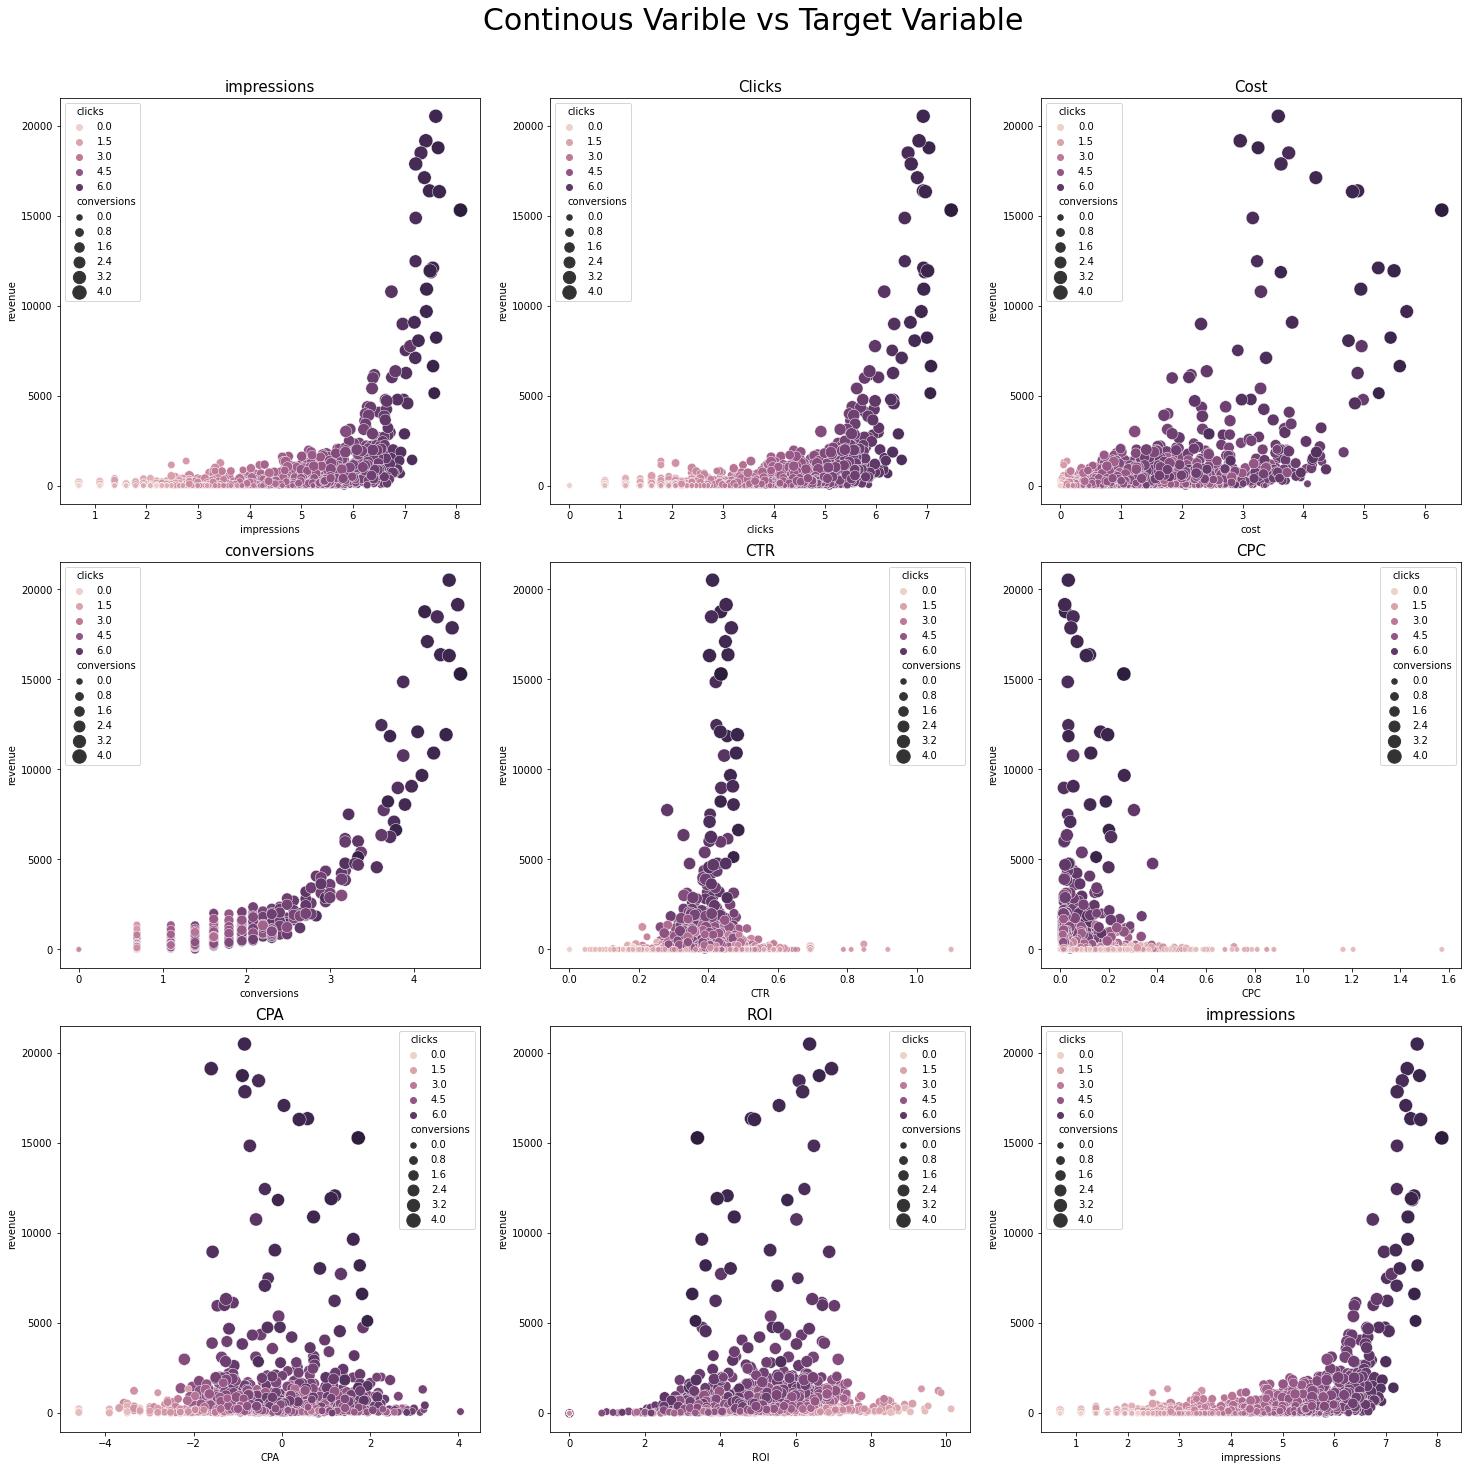

In [297]:
# len(num_cols)
fig, ax = plt.subplots(3,3, figsize = (21,21))
fig.tight_layout(pad=  4.0)
fig.subplots_adjust(top = 0.92)
fig.suptitle('Continous Varible vs Target Variable', fontsize = 30)
sns.scatterplot(ax= ax[0,0], data = df, x = 'impressions', y = 'revenue' , hue= "clicks", size = 'conversions', sizes=(30,200))
ax[0,0].set_title('impressions', fontsize = 15)
sns.scatterplot(ax= ax[0,1], data = df, x = 'clicks', y = 'revenue' , hue= "clicks", size = 'conversions', sizes=(30,200))
ax[0,1].set_title('Clicks', fontsize = 15)
sns.scatterplot(ax= ax[0,2], data = df, x = 'cost', y = 'revenue' , hue= "clicks", size = 'conversions', sizes=(30,200))
ax[0,2].set_title('Cost', fontsize = 15)
sns.scatterplot(ax= ax[1,0], data = df, x = 'conversions', y = 'revenue' , hue= "clicks", size = 'conversions', sizes=(30,200))
ax[1,0].set_title('conversions', fontsize = 15)
sns.scatterplot(ax= ax[1,1], data = df, x = 'CTR', y = 'revenue' , hue= "clicks", size = 'conversions', sizes=(30,200))
ax[1,1].set_title('CTR', fontsize = 15)
sns.scatterplot(ax= ax[1,2], data = df, x = 'CPC', y = 'revenue' , hue= "clicks", size = 'conversions', sizes=(30,200))
ax[1,2].set_title('CPC', fontsize = 15)
sns.scatterplot(ax= ax[2,0], data = df, x = 'CPA', y = 'revenue' , hue= "clicks", size = 'conversions', sizes=(30,200))
ax[2,0].set_title('CPA', fontsize = 15)
sns.scatterplot(ax= ax[2,1], data = df, x = 'ROI', y = 'revenue' , hue= "clicks", size = 'conversions', sizes=(30,200))
ax[2,1].set_title('ROI', fontsize = 15)
sns.scatterplot(ax= ax[2,2], data = df, x = 'impressions', y = 'revenue' , hue= "clicks", size = 'conversions', sizes=(30,200))
ax[2,2].set_title('impressions', fontsize = 15)
fig.savefig('Numeric_after.jpg', dpi = 200)

In [298]:
df.head()

,impressions,clicks,cost,conversions,revenue,CTR,CPC,CPA,ROI,ad_values
0,3.218876,1.945910,0.076961,0.000000,0.00,0.223144,0.013245,inf,0.000000,0.316667
1,0.693147,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,-inf,0.000000,0.000000
2,2.639057,1.609438,0.039221,0.000000,0.00,0.268264,0.009950,inf,0.000000,0.227778
3,1.791759,1.609438,0.076961,0.000000,0.00,0.587787,0.019803,inf,0.000000,0.092715
4,5.513429,4.844187,0.828552,1.609438,925.71,0.412190,0.010186,-1.131652,6.577311,5.396552


In [299]:
for i in df.describe().columns:
    print(i, df[i].min(), df[i].max())

impressions 0.6931471805599453 8.083328608786376
clicks 0.0 7.4798641311650265
cost 0.0 6.2771133037735884
conversions 0.0 4.553876891600541
revenue 0.0 20515.41
CTR 0.0 1.0986122886681098
CPC 0.0 1.57069708411767
CPA -inf inf
ROI 0.0 10.124348500692786
ad_values 0.0 85.0


c:\users\anant sakhare\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


In [300]:
df.drop('CPA', axis = 1, inplace =True)

In [301]:
df['ad_values'] = (np.log1p(df.ad_values))

In [302]:
df.head()

,impressions,clicks,cost,conversions,revenue,CTR,CPC,ROI,ad_values
0,3.218876,1.945910,0.076961,0.000000,0.00,0.223144,0.013245,0.000000,0.275103
1,0.693147,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
2,2.639057,1.609438,0.039221,0.000000,0.00,0.268264,0.009950,0.000000,0.205206
3,1.791759,1.609438,0.076961,0.000000,0.00,0.587787,0.019803,0.000000,0.088666
4,5.513429,4.844187,0.828552,1.609438,925.71,0.412190,0.010186,6.577311,1.855759


## Feature Selection

**Check for multicolinearity**

<AxesSubplot:>

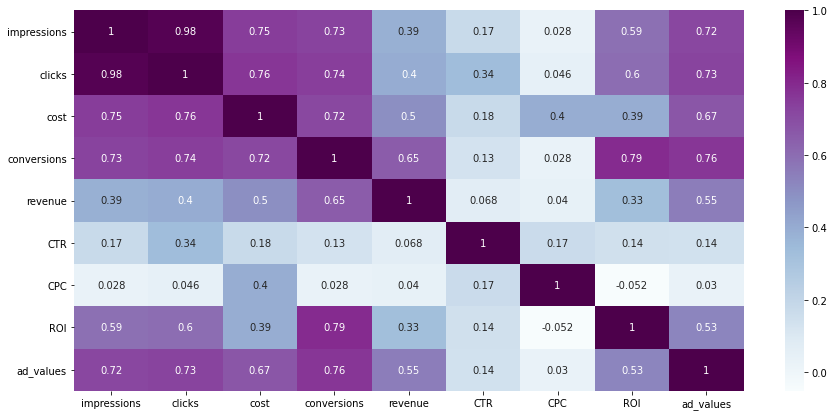

In [303]:
plt.figure(figsize =(15,7))
sns.heatmap(df.corr(), cmap = 'BuPu', annot = True)

In [304]:
## clicks & impression has stron co relations so we drop impression because less corr with target variable tha clicks 
df.drop('impressions', axis =1 , inplace = True)

In [305]:
df.columns 

Index(['clicks', 'cost', 'conversions', 'revenue', 'CTR', 'CPC', 'ROI',
       'ad_values'],
      dtype='object')

In [306]:
X = df.drop(['revenue', 'ROI'], axis= 1)
y = df.revenue

In [307]:
X.shape, y.shape

((4571, 6), (4571,))

## Model Building

In [308]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LogisticRegression
from sklearn.ensemble  import RandomForestRegressor, StackingRegressor
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklego.meta import ZeroInflatedRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [309]:
# X_train, X_test, y_train, y_test =train_test_split(X,y, test_size= 0.33, random_state=2021)

In [310]:
# X_train.shape, X_test.shape, y_train.shape, y_test.shape

**models**

In [311]:
# # Linear Regression
# linear = RandomForestRegressor()
# model1  =  linear.fit(X_train, y_train)
# model1.score(X_test, y_test)

In [312]:
# import pandas as pd
# import numpy as np


# # Instantiate the zero-inflated regressor.
# zir = ZeroInflatedRegressor(
#     classifier=SVC(C = 0.1, kernel='linear', random_state=11),
#     regressor=RandomForestRegressor(n_estimators = 2000, 
#                                random_state = 42, 
#                                criterion = 'mae',
#                                bootstrap=True)
# )
# # Easy fit!
# zero_model = zir.fit(X,y)
# zero_model.score(X_test, y_test)


In [313]:
# np.sqrt(mean_squared_error(y_test, zero_model.predict(X_test)))

In [314]:
# np.sqrt(mean_squared_error(y_test, zero_model.predict(X_test)))

In [315]:
# df.head()

In [316]:

# target= np.array(df['revenue'])
# features = df.drop(['revenue', 'ROI'], axis = 1)
# feature_list = list(features.columns)
# features = np.array(features)

# ## RANDOM FOREST - KFOLD AND MODEL 


# from sklearn.model_selection import KFold
# from sklearn.ensemble import RandomForestRegressor
    
# kf = KFold(n_splits=10,random_state=42,shuffle=True)
# accuracies = []
# for train_index, test_index in kf.split(features):

#     data_train   = features[train_index]
#     target_train = target[train_index]

#     data_test    = features[test_index]
#     target_test  = target[test_index]

#     rf = RandomForestRegressor(n_estimators = 1000, 
#                                random_state = 42, 
#                                criterion = 'mse',
#                                bootstrap=True)
    
#     rf.fit(data_train, target_train)

#     predictions = rf.predict(data_test)

#     errors = abs(predictions - target_test)

#     print('Mean Absolute Error:', round(np.mean(errors), 2))
    
#     mape = 100 * (errors / target_test)
#     accuracy = 100 - np.mean(mape)
#     print('Accuracy:', round(accuracy, 2), '%.')
#     print('scores train', rf.score(data_train, target_train))
#     print('scores test', rf.score(data_test, target_test))
    

#     accuracies.append(accuracy)

# average_accuracy = np.mean(accuracies)
# print('Average accuracy:', average_accuracy)

In [317]:
# print(np.sqrt(mean_squared_error(y_test, rf.predict(X_test))))
# np.sqrt(mean_squared_error(y_train, rf.predict(X_train)))


## Test Data Cleaning 

In [318]:
# test_ready = pd.read_csv('read_test.csv')
# test_ready = test_ready[X.columns]

In [319]:
# test_ready.head()

In [320]:
# zer_predication = zero_model.predict(test_ready)

In [321]:
# output = pd.DataFrame()
# output['revenue'] = zer_predication
# output.to_csv('submission1.csv', index= False)

In [322]:
# ans = rf.predict(test_ready)

In [323]:
# output = pd.DataFrame()
# output['revenue'] = ans
# output.to_csv('submission2.csv', index= False)

In [324]:
# ans

In [325]:
# ms = MinMaxScaler()
# ss =StandardScaler()

In [326]:
# X_ms = ms.fit_transform(X)
# test_ms = ms.transform(test_ready)


In [327]:
rf = RandomForestRegressor(n_estimators = 1000, 
                               random_state = 42, 
                               criterion = 'mse',
                               bootstrap=True)
model3 = rf.fit(X,y)


In [328]:
# model3ub = model3.predict()

In [329]:
# output = pd.DataFrame()
# output['revenue'] = model3ub
# output.to_csv('submission3.csv', index= False)

In [330]:
X =data.drop(['date', "ad", "campaign", 'revenue'], axis = 1)
y =data.revenue
X_test = test.drop(['date','ad', 'campaign'], axis = 1 )
X_test = X_test[X.columns]
# X
scalar = MinMaxScaler()
ss = MinMaxScaler()

In [331]:
# scalar = MinMaxScaler()
X = pd.get_dummies(X)
X = scalar.fit_transform(X)
X_test =  pd.get_dummies(X_test)
X_test = scalar.transform(X_test)
model6 = rf.fit(X,y)
print(model6.score(X, y))
sub6 = model6.predict(X_test)
output = pd.DataFrame()
output['revenue5'] = sub6
output.to_csv('submission8.csv', index =  False)


0.990908955732868


In [334]:
import pandas as pd
import numpy as np


# Instantiate the zero-inflated regressor.
zir = ZeroInflatedRegressor(
    classifier=SVC(C = 0.1,kernel='linear', gamma='scale',  random_state=2021),
    regressor=RandomForestRegressor(n_estimators = 1331, 
                               random_state = 42, 
                               criterion = 'mse',
                               min_samples_leaf = 5,
                               min_samples_split= 4,
                               max_features = 'auto',
                               bootstrap=True,
                               max_depth = 40))
# Easy fit!
zero_model = zir.fit(X,y)
zero_model.score(X, y)
X

array([[7.10315009e-03, 3.38791643e-03, 1.50588235e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.70599135e-03, 2.25861095e-03, 7.52941176e-05, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       ...,
       [4.63248919e-03, 4.51722191e-03, 2.25882353e-04, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.11179741e-02, 7.34048560e-03, 4.32941176e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.55898703e-03, 5.64652739e-03, 2.63529412e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [335]:
jio = zero_model.predict(X_test)
output = pd.DataFrame()
output['revenue'] = sub6
output.to_csv('zero11.csv', index =  False)

In [336]:
jio[0:11]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [182]:
# Fitting 3 folds for each of 100 candidates, totalling 300 fits
# {'n_estimators': 3400, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': None, 'bootstrap': True}

In [337]:
X_test

array([[3.70599135e-02, 2.76679842e-02, 1.09176471e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.48548487e-03, 6.77583286e-03, 3.20000000e-04, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.23533045e-03, 1.69395822e-03, 9.41176471e-05, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       ...,
       [7.41198271e-03, 6.21118012e-03, 2.63529412e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.47066090e-03, 2.25861095e-03, 1.12941176e-04, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [2.03829524e-02, 1.52456239e-02, 6.21176471e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [183]:
sub6[0:11]


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [184]:
X

array([[7.10315009e-03, 3.38791643e-03, 1.50588235e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.70599135e-03, 2.25861095e-03, 7.52941176e-05, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       ...,
       [4.63248919e-03, 4.51722191e-03, 2.25882353e-04, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.11179741e-02, 7.34048560e-03, 4.32941176e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.55898703e-03, 5.64652739e-03, 2.63529412e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [185]:

import numpy as np

target= np.array(data['revenue'])
features = X
feature_list = list(features)
features = np.array(features)

## RANDOM FOREST - KFOLD AND MODEL 


from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
    
kf = KFold(n_splits=10,random_state=2021,shuffle=True)
accuracies = []
for train_index, test_index in kf.split(features):

    data_train   = features[train_index]
    target_train = target[train_index]

    data_test    = features[test_index]
    target_test  = target[test_index]

    rf = RandomForestRegressor(n_estimators = 1000, 
                               random_state = 42, 
                               criterion = 'mse',
                               bootstrap=True)
    
    rf.fit(data_train, target_train)

    predictions = rf.predict(data_test)

    errors = abs(predictions - target_test)

    print('Mean Absolute Error:', round(np.mean(errors), 2))
    
    mape = 100 * (errors / target_test)
    accuracy = 100 - np.mean(mape)
    print('Accuracy:', round(accuracy, 2), '%.')

    accuracies.append(accuracy)
    

average_accuracy = np.mean(accuracies)
print('Average accuracy:', average_accuracy)

Mean Absolute Error: 57.6
Accuracy: nan %.


c:\users\anant sakhare\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in true_divide
c:\users\anant sakhare\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in true_divide


Mean Absolute Error: 68.97
Accuracy: nan %.


c:\users\anant sakhare\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in true_divide
c:\users\anant sakhare\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in true_divide


Mean Absolute Error: 90.94
Accuracy: nan %.


c:\users\anant sakhare\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in true_divide


Mean Absolute Error: 64.27
Accuracy: nan %.


c:\users\anant sakhare\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in true_divide
c:\users\anant sakhare\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in true_divide


Mean Absolute Error: 69.29
Accuracy: nan %.


c:\users\anant sakhare\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in true_divide


Mean Absolute Error: 82.16
Accuracy: nan %.


c:\users\anant sakhare\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in true_divide


Mean Absolute Error: 86.22
Accuracy: nan %.


c:\users\anant sakhare\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in true_divide


Mean Absolute Error: 54.23
Accuracy: nan %.


c:\users\anant sakhare\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in true_divide


Mean Absolute Error: 80.05
Accuracy: nan %.


c:\users\anant sakhare\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in true_divide


Mean Absolute Error: 73.27
Accuracy: nan %.
Average accuracy: nan


c:\users\anant sakhare\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in true_divide


In [186]:

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 4000, num = 20)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [100, 305, 510, 715, 921, 1126, 1331, 1536, 1742, 1947, 2152, 2357, 2563, 2768, 2973, 3178, 3384, 3589, 3794, 4000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [187]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(data_train, target_train)

print(rf_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'n_estimators': 1331, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 40, 'bootstrap': True}


In [188]:
## RANDOM FOREST - KFOLD AND MODEL 

from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
    
kf = KFold(n_splits=10,random_state=42,shuffle=True)
accuracies = []
for train_index, test_index in kf.split(features):

    data_train   = features[train_index]
    target_train = target[train_index]

    data_test    = features[test_index]
    target_test  = target[test_index]

    rf = RandomForestRegressor(n_estimators = 1331, 
                               random_state = 42, 
                               criterion = 'mse',
                               min_samples_leaf = 5,
                               min_samples_split= 4,
                               max_features = 'auto',
                               bootstrap=True,
                               max_depth = 40)
    
    rf.fit(data_train, target_train)

    predictions = rf.predict(data_test)

    errors = abs(predictions - target_test)

    print('Mean Absolute Error:', round(np.mean(errors), 2))
    
    mape = 100 * (errors / target_test)
    accuracy = 100 - np.mean(mape)
    print('Accuracy:', round(accuracy, 2), '%.')
    print(rf.score(data_train, target_train))
    print('test,', rf.score(data_test, target_test))
    

    accuracies.append(accuracy)

average_accuracy = np.mean(accuracies)
print('Average accuracy:', average_accuracy)

Mean Absolute Error: 58.41
Accuracy: nan %.


c:\users\anant sakhare\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


0.9600205192731283
test, 0.8854713002145447
Mean Absolute Error: 72.45
Accuracy: nan %.


c:\users\anant sakhare\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in true_divide
c:\users\anant sakhare\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


0.9554173684330277
test, 0.9452597263984964
Mean Absolute Error: 57.11
Accuracy: nan %.


c:\users\anant sakhare\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


0.9596929750071614
test, 0.8927100220686042
Mean Absolute Error: 78.24
Accuracy: nan %.


c:\users\anant sakhare\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in true_divide
c:\users\anant sakhare\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


0.9569306690056973
test, 0.9352548303100772
Mean Absolute Error: 68.22
Accuracy: nan %.


c:\users\anant sakhare\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


0.9613157080058239
test, 0.6789502332576666
Mean Absolute Error: 83.69
Accuracy: nan %.


c:\users\anant sakhare\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


0.9620094482082362
test, 0.8797109126063057
Mean Absolute Error: 80.29
Accuracy: nan %.


c:\users\anant sakhare\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


0.9540093035115528
test, 0.9431455114767975
Mean Absolute Error: 79.68
Accuracy: nan %.


c:\users\anant sakhare\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


0.9542506085233148
test, 0.9549146113977638
Mean Absolute Error: 92.02
Accuracy: nan %.


c:\users\anant sakhare\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in true_divide
c:\users\anant sakhare\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


0.96223777893867
test, 0.9151238901335211
Mean Absolute Error: 60.46
Accuracy: nan %.


c:\users\anant sakhare\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


0.9578918605784594
test, 0.9470285645407273
Average accuracy: nan


In [ ]:
tune_output=  rf.predict(X_test)
tune_output

In [ ]:

## SAVING THE DECISION TREE 

from sklearn.tree import export_graphviz
import pydot
tree = rf.estimators_[5]
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')

In [ ]:
y = rf.feature_importances_
list_y = [a for a in y if a > 0.005]
print(list_y)

list_of_index = []
for i in list_y:
    a = np.where(y==i)
    list_of_index.append(a)
print(list_of_index)

In [ ]:
list_of_index = [0,1,2,3,4,24,97,249,280,308]


In [ ]:

col = []
for i in feature_list:
    col.append(i)
labels = []
for i in list_of_index:
    b = col[i]
    labels.append(b)

In [ ]:
import matplotlib.pyplot as plt
y = list_y
fig, ax = plt.subplots() 
width = 0.8
ind = np.arange(len(y)) 
ax.barh(ind, y,width, color="pink")
ax.set_yticks(ind+width/10)
ax.set_yticklabels(labels, minor=False)
plt.title('Feature importance in Random Forest Regression')
plt.xlabel('Relative importance')
plt.ylabel('feature') 
plt.figure(figsize=(10,8.5))
fig.set_size_inches(10, 8.5, forward=True)

In [ ]:
rf.score(X, y)

In [ ]:
sub6 = rf.predict(X_test)
output = pd.DataFrame()
output['revenue'] = sub6
output.to_csv('submission5.csv', index= False)

In [ ]:
pd.read_csv('submission4.csv')

In [ ]:
sub6[10:30]

In [ ]:
tune_output[10:30]

In [ ]:
output = pd.DataFrame()
output['revenue'] = tune_output
output.to_csv('submission6.csv', index= False)